# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [43]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [117]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [118]:
# Write your code here
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
There are 3 different data types and 1898 entries


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [120]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: 
No there are not any missing values


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: 
* Min Prep Time = 20 min, 
* Average Prep Time = 27.4 min, 
* MaxPrep Time = 35 min


### **Question 5:** How many orders are not rated? [1 mark]

In [122]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* There are 736 orders that have not been rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [123]:
df['order_id'].nunique() #how many unique order_ids there are

1898

In [124]:
df['customer_id'].nunique() #How many unique customers we have in our data

1200

In [125]:
df['restaurant_name'].nunique() #How many restaurants we have in our data

178

In [126]:
df['cuisine_type'].nunique() #Explore how many cuisine types we have

14

Text(0, 0.5, 'Count')

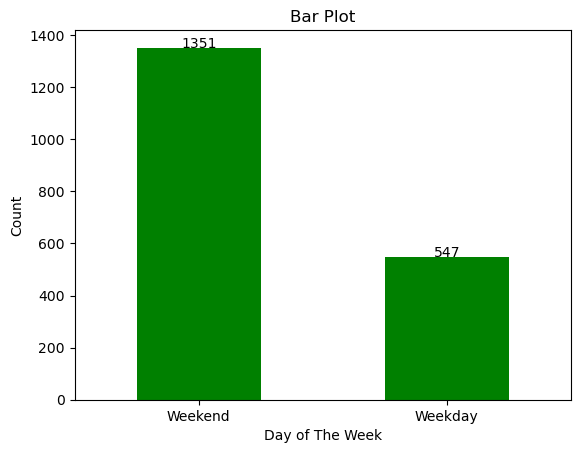

In [127]:
#bar plot to get the count of the Weekdays and Weekends in the data

df.day_of_the_week.value_counts().plot(kind='bar', rot=0, color='green') 
plt.text(x=-0.07, y=df.day_of_the_week.value_counts()[0]+1, s=df.day_of_the_week.value_counts()[0] )
plt.text(x=0.95, y=df.day_of_the_week.value_counts()[1]+0, s=df.day_of_the_week.value_counts()[1] )
plt.title('Bar Plot')
plt.xlabel('Day of The Week')
plt.ylabel('Count')

* The orders at the Weekends is almost 3 times bigger

([<matplotlib.patches.Wedge at 0x18cf78dba30>,
 [Text(0.4143619589872989, 1.1261901113685062, 'Not Given'),
  Text(-1.060690598931125, -0.2914368771091458, '3 Star Rating'),
  Text(0.33506657685854213, -1.0477262949226285, '4 Star Rating'),
  Text(1.047170287932774, -0.33680021981998653, '5 Star Rating')],
 [Text(0.24171114274259098, 0.6569442316316285, '38.8%'),
  Text(-0.5785585085078864, -0.1589655693322613, '31.0%'),
  Text(0.1827635873773866, -0.5714870699577973, '20.3%'),
  Text(0.5711837934178767, -0.18370921081090175, '9.9%')])

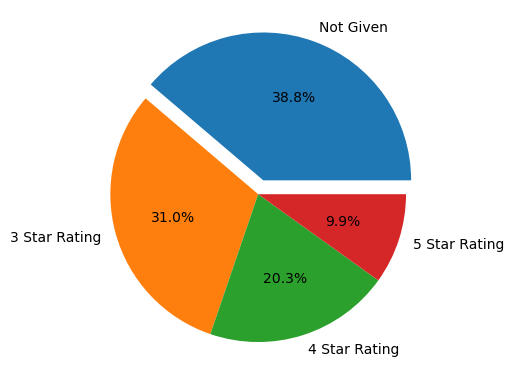

In [128]:
#plot the ratings of the orders

plt.pie(df.rating.value_counts(), autopct = '%.1f%%', radius=1, labels=['Not Given','3 Star Rating','4 Star Rating','5 Star Rating'], explode=[0.1,0,0,0])


* From above the pie plot it can been seen that almost 40% of the orders have not been rated.

<Axes: xlabel='cuisine_type', ylabel='count'>

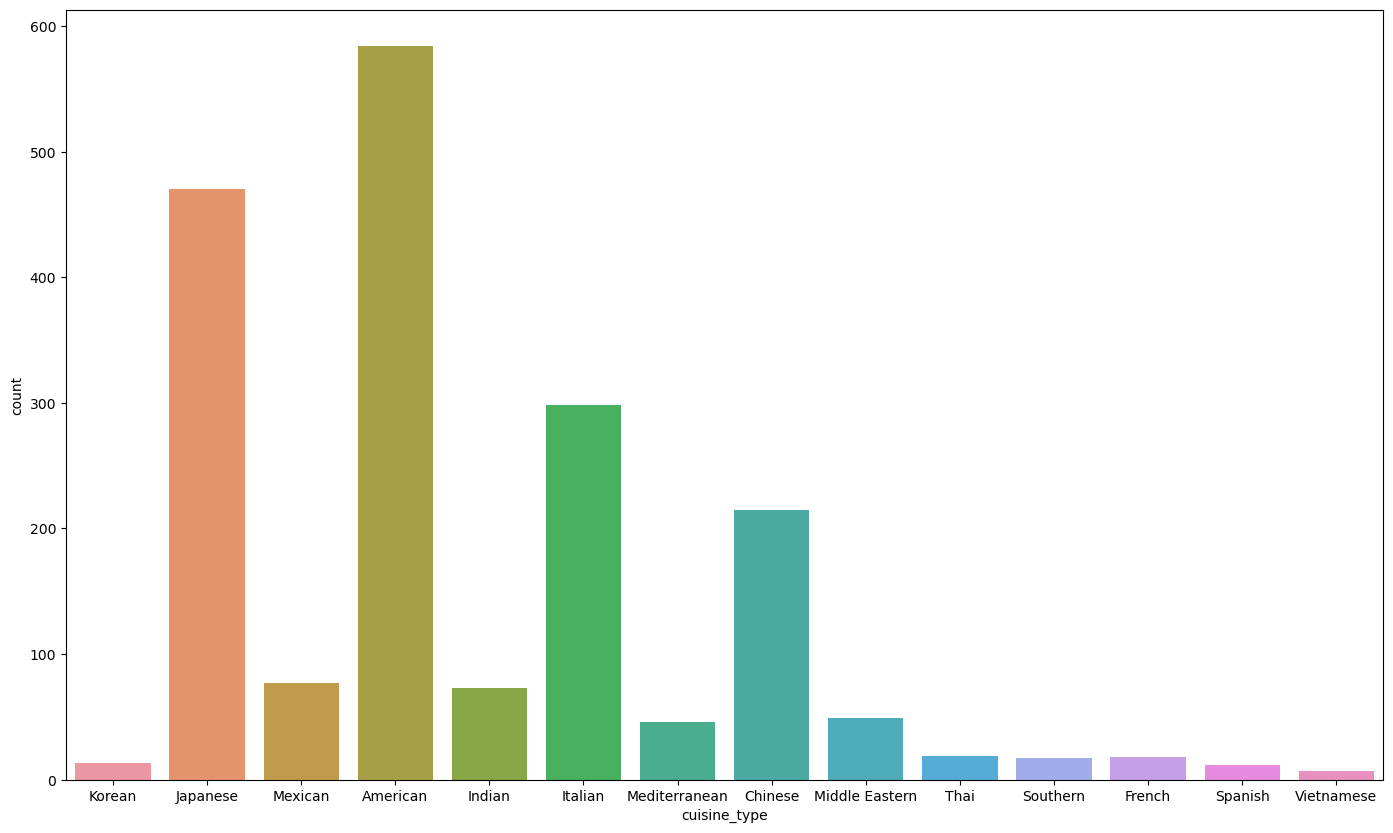

In [129]:
plt.figure(figsize=(17,10))
sns.countplot(data=df, x='cuisine_type')


* The most common cuisine type are the American, the Japanese and the Italian respectively. 

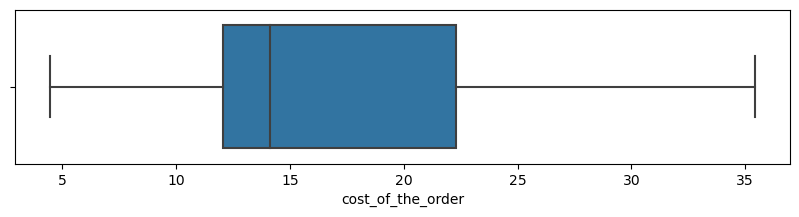

In [130]:
plt.figure(figsize=(10,2))
sns.boxplot(data=df, x='cost_of_the_order')


plt.show()

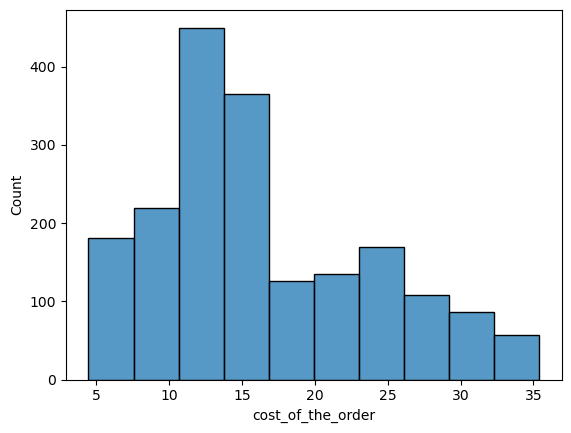

In [131]:
sns.histplot(data=df, x='cost_of_the_order', bins=10)
plt.show()

* Most of the orders cost 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [162]:
df['restaurant_ranked']=df['order_id'].rank(ascending=1, method='dense')
df.sort_values('restaurant_ranked', ascending=0)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,restaurant_ranked
1806,1478444,355090,Shake Shack,American,31.43,Weekend,3,22,24,1898.0
887,1478443,96943,Cafe Mogador,Middle Eastern,29.88,Weekend,4,20,17,1897.0
1668,1478442,378035,Five Guys Burgers and Fries,American,29.73,Weekend,5,21,25,1896.0
755,1478441,228541,RedFarm Hudson,Chinese,29.10,Weekend,Not given,27,28,1895.0
287,1478440,231042,Momoya,Japanese,12.13,Weekend,5,22,21,1894.0
...,...,...,...,...,...,...,...,...,...,...
281,1476551,49034,The Smile,American,12.18,Weekend,Not given,22,27,5.0
1518,1476550,101347,The Loop,Japanese,16.98,Weekend,5,26,27,4.0
1200,1476549,75169,Tamarind TriBeCa,Indian,6.74,Weekend,5,25,26,3.0
357,1476548,122609,Blue Ribbon Sushi,Japanese,6.84,Weekend,4,20,30,2.0


#### Observations:
* The Top 5 Restaurant are the 'Shake Shack', 'Cafe Mogador', 'Five Guys Burgers and Fries', 'RedFarm Hudson' and 'Momoya' respectifully.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

<Axes: xlabel='cuisine_type', ylabel='count'>

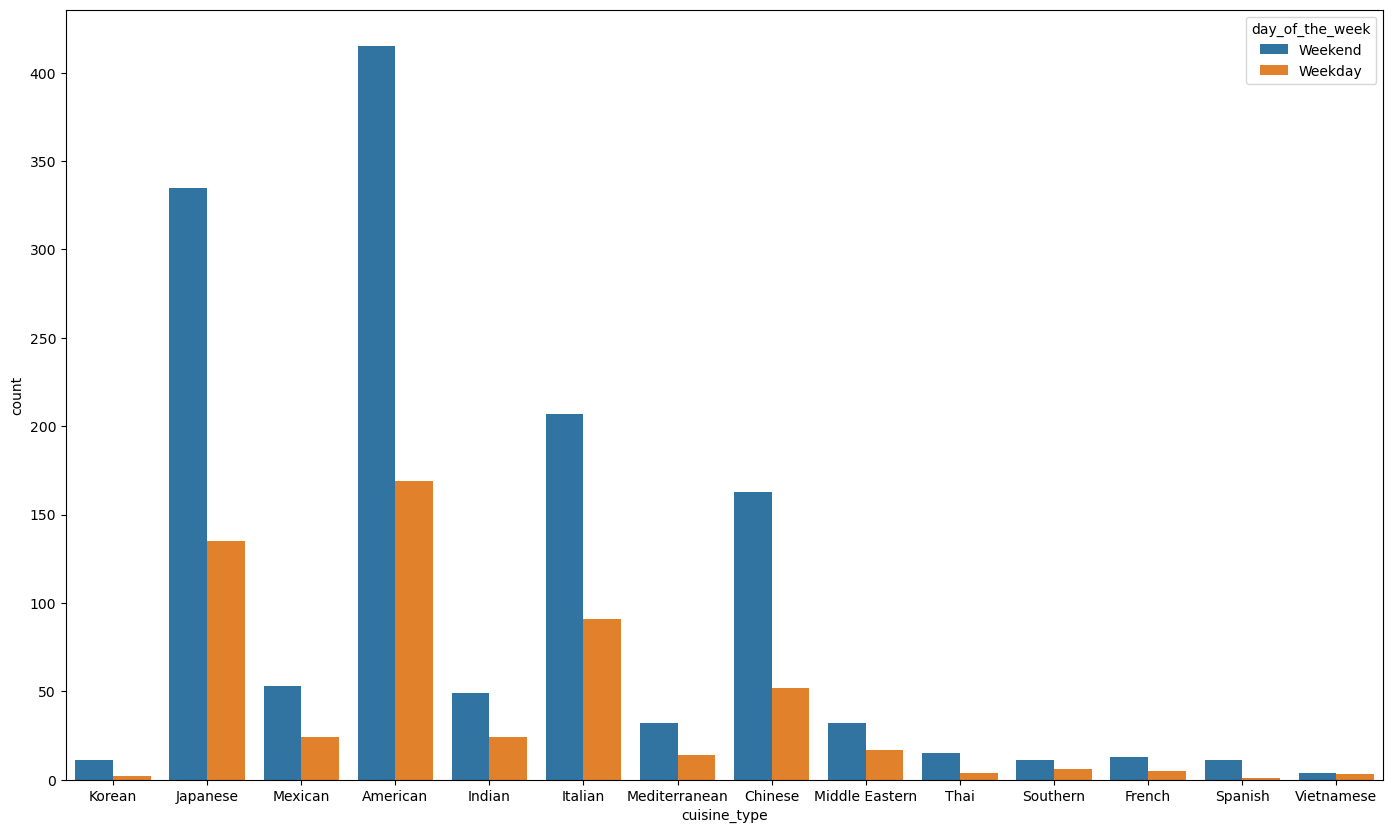

In [76]:
plt.figure(figsize=(17,10))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')

#### Observations:
* The American cuisine is the most popular in the Weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [181]:
cost_over_twenty=df[df['cost_of_the_order']>20]
print(cost_over_twenty.shape[0])
cost_over_twenty_perc=(cost_over_twenty.shape[0]/df.shape[0])*100
print(round(cost_over_twenty_perc, 2),'%')

555
29.24 %


#### Observations:
* The total orders that cost over 20 dollars are 555.
* The percentage of the orders that cost over 20 dollars are 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [189]:
mean_order_delivery_time=(df['delivery_time'].sum())/df.shape[0]
round(mean_order_delivery_time, 2)

24.16

#### Observations:
* The mean order delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [190]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
* The customers with the following IDs are '52832', '47440' and '83287'. The customers can receive 20% discount vouchers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


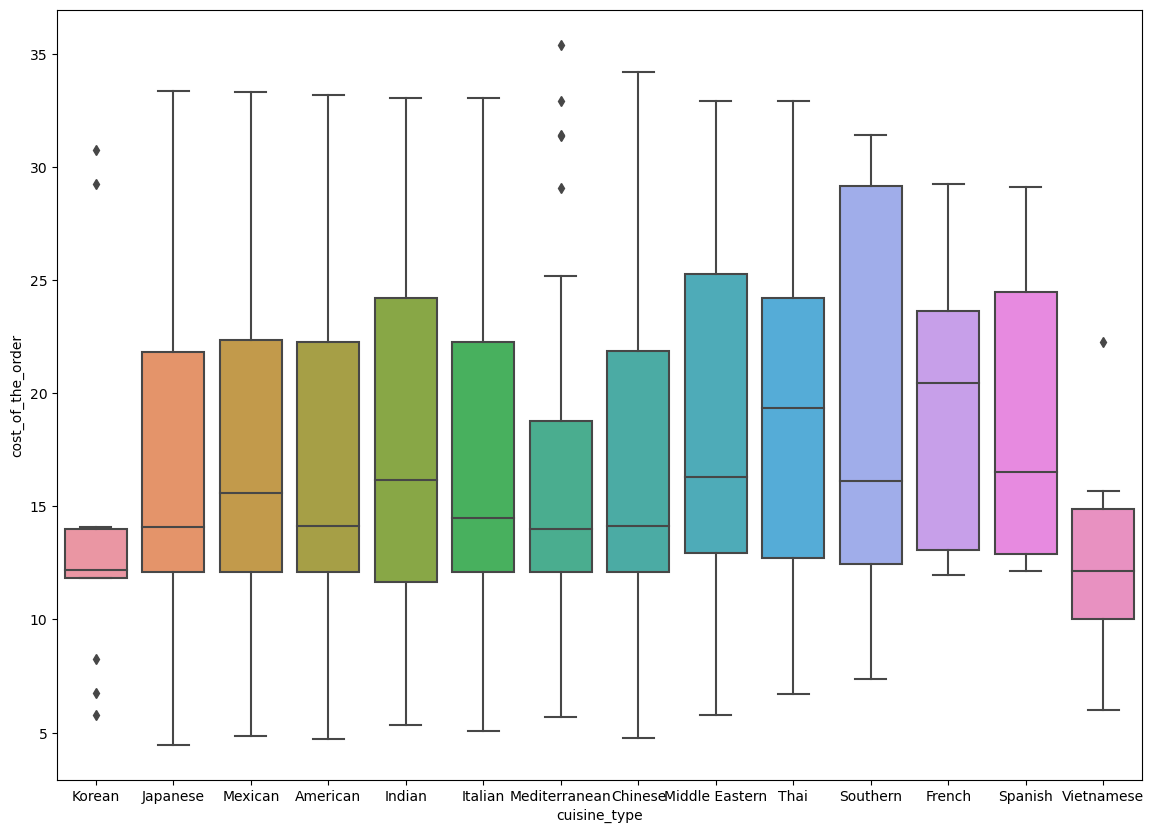

In [213]:
plt.figure(figsize=(14,10))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.show()

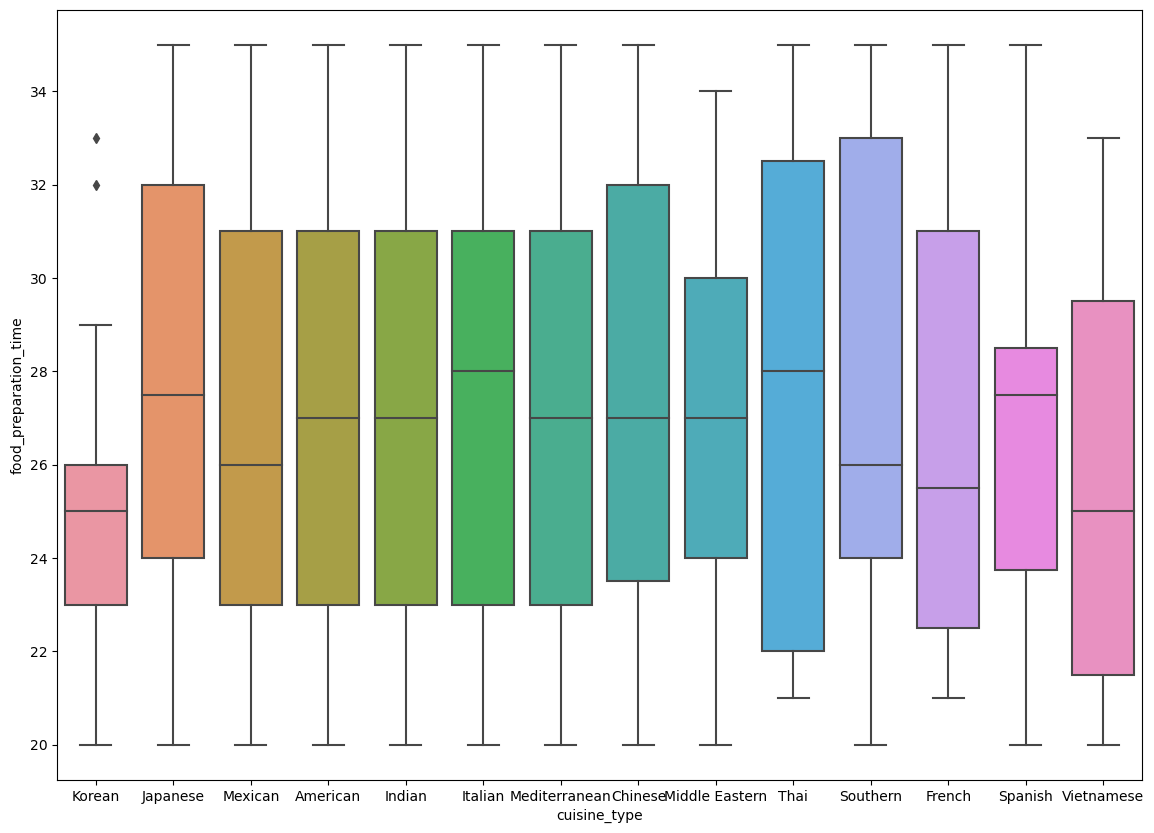

In [214]:
plt.figure(figsize=(14,10))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.show()

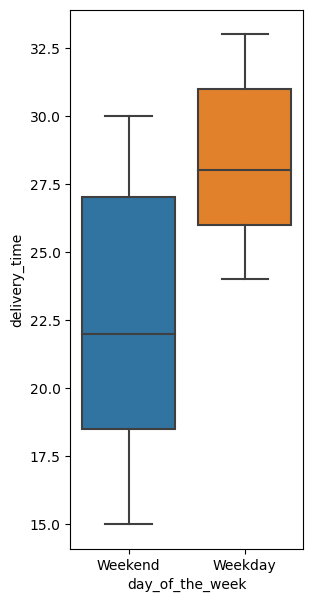

In [271]:
plt.figure(figsize=(3,7))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df)
plt.show()

<Axes: xlabel='delivery_time', ylabel='rating'>

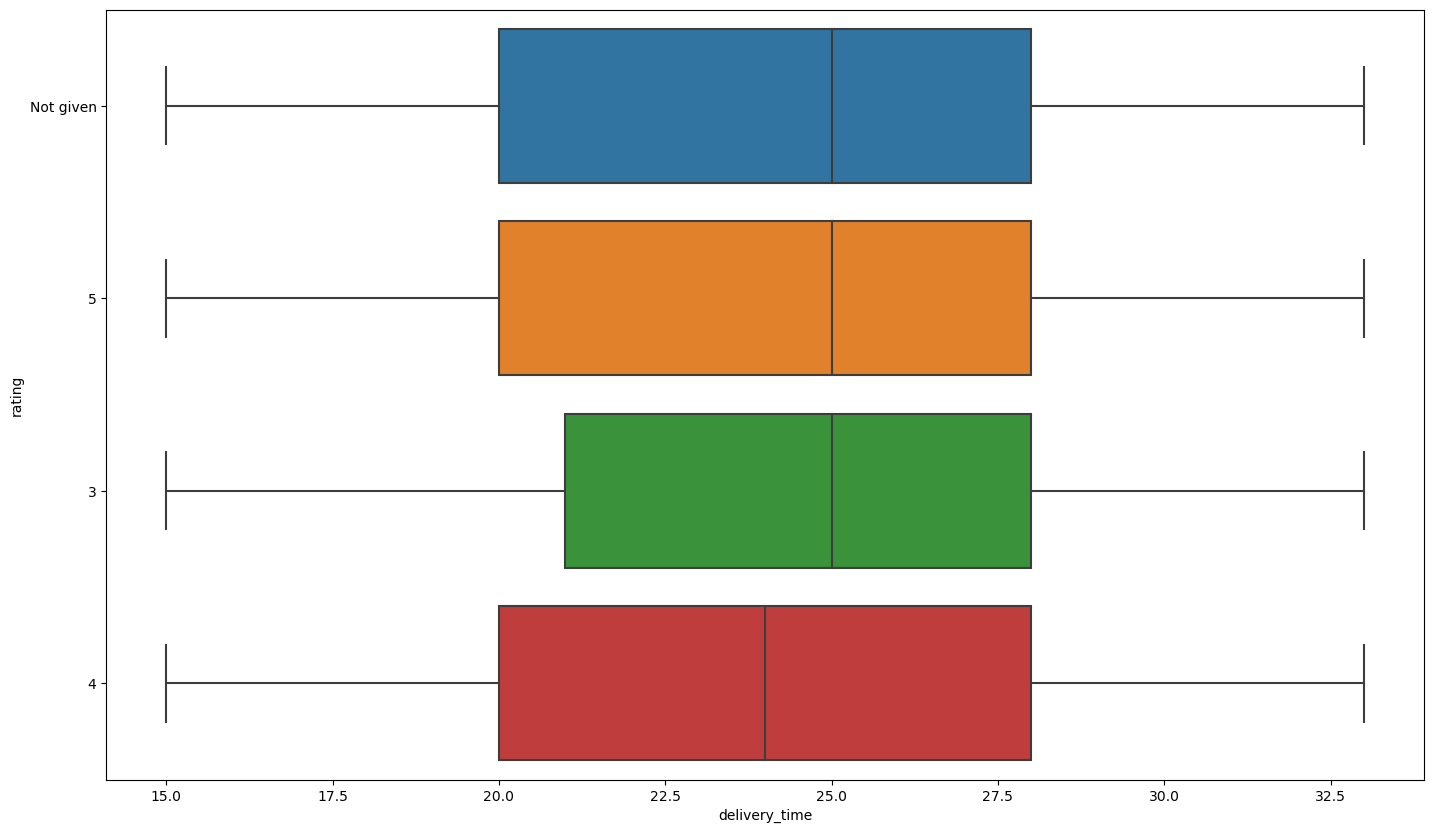

In [252]:
plt.figure(figsize=(17,10))
sns.boxplot(data=df, x='delivery_time', y='rating')

<Axes: xlabel='food_preparation_time', ylabel='rating'>

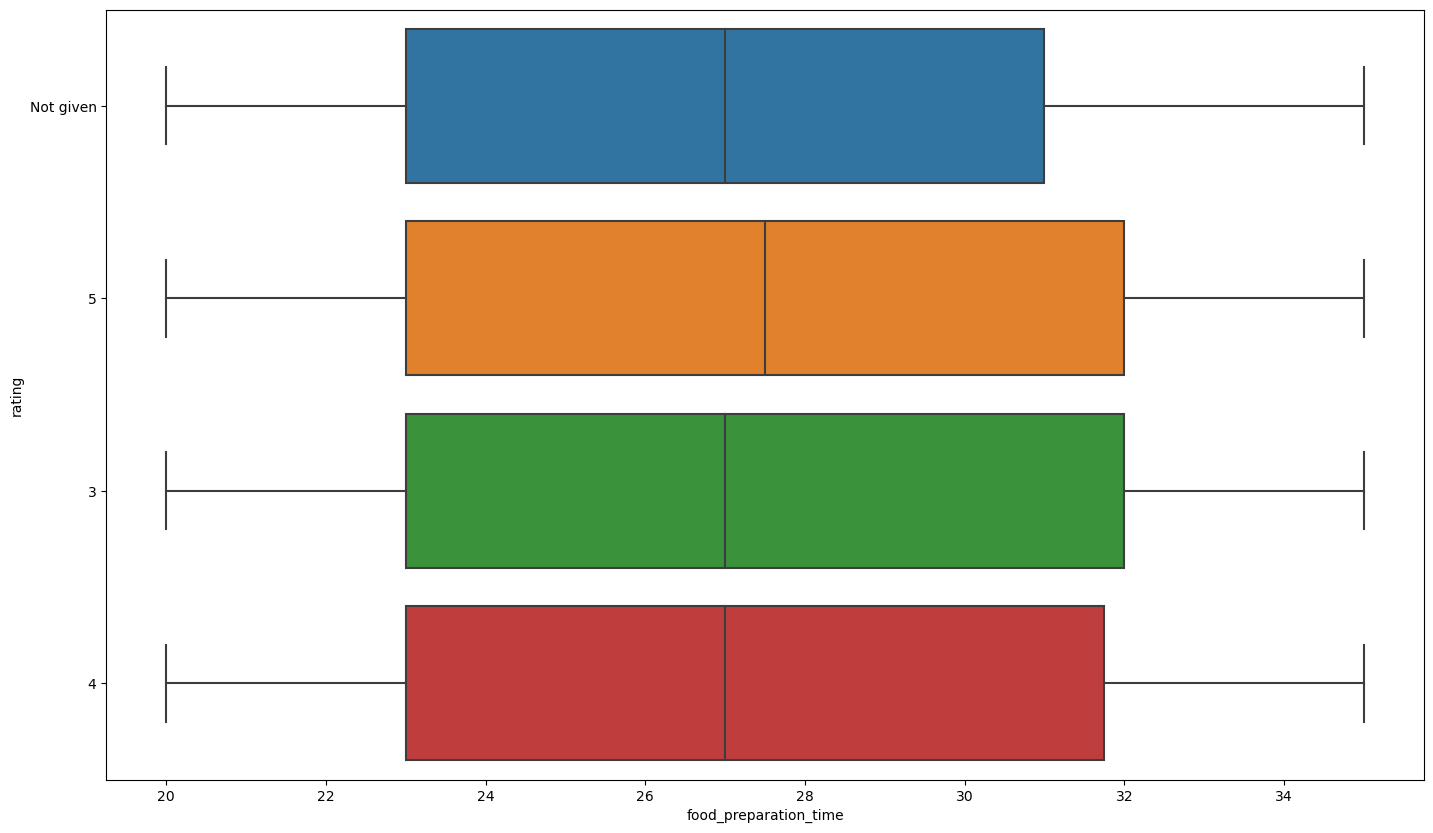

In [253]:
plt.figure(figsize=(17,10))
sns.boxplot(data=df, x='food_preparation_time', y='rating')

<Axes: xlabel='cost_of_the_order', ylabel='rating'>

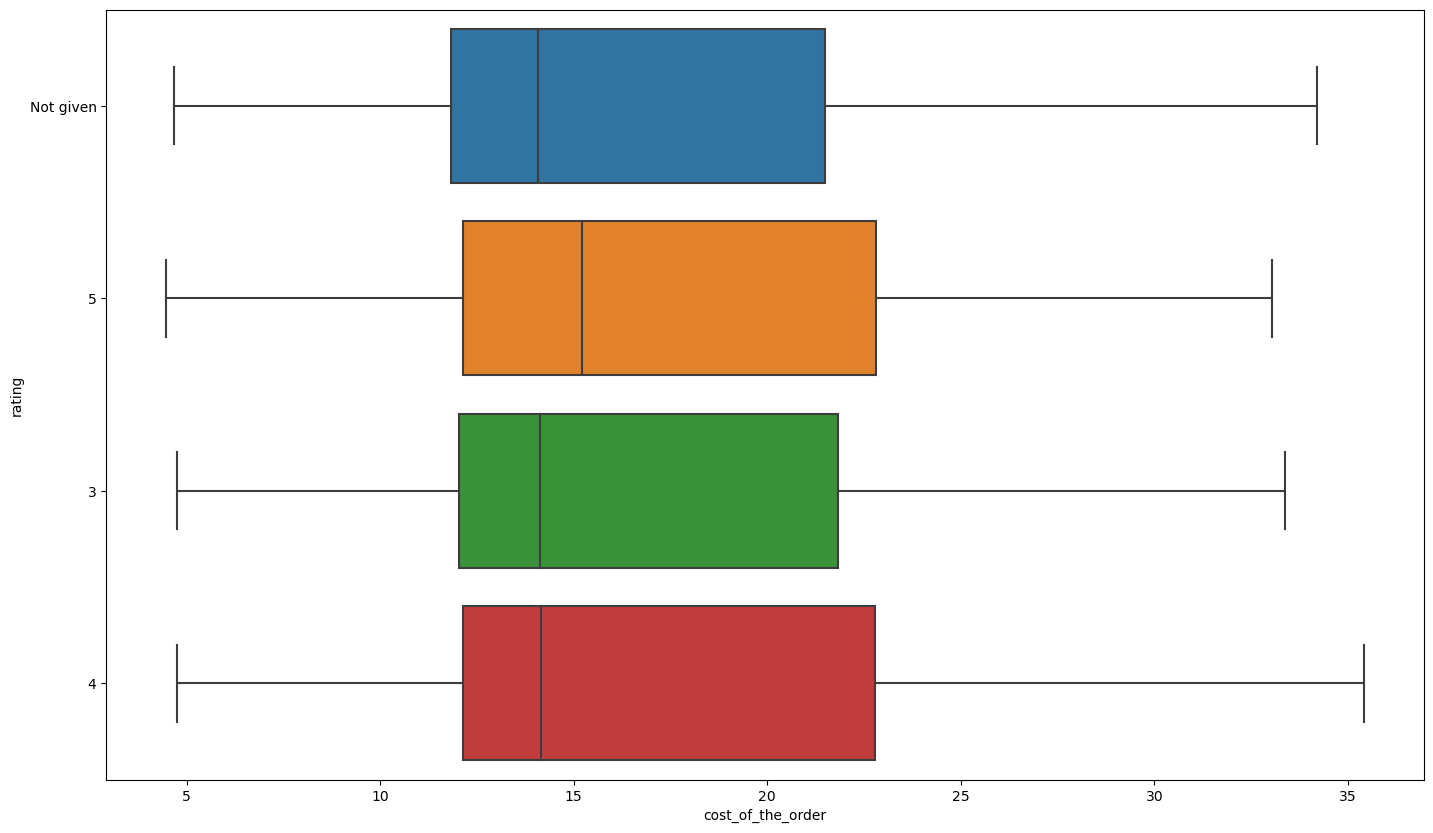

In [338]:
plt.figure(figsize=(17,10))
sns.boxplot(data=df, x='cost_of_the_order', y='rating')

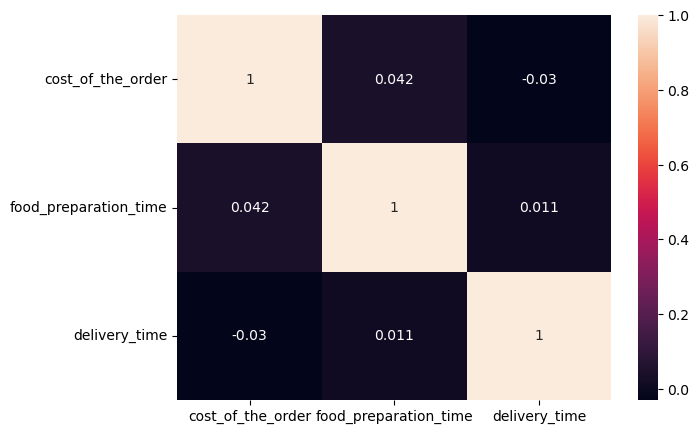

In [275]:
corr_list=['cost_of_the_order','food_preparation_time','delivery_time']
plt.figure(figsize=(7, 5))
sns.heatmap(df[corr_list].corr(), annot=True)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [340]:
def calc_revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(calc_revenue)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,restaurant_ranked,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,601.0,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1139.0,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,524.0,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,788.0,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1703.0,1.7385,49


In [299]:
# Get the total revenue and print it
total_rev = df['Revenue'].sum()
round(total_rev,2)

6166.3

#### Observations:
* The net revenue is around 6166.3 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [324]:
df['total_time']=df['food_preparation_time']+df['delivery_time']
time_over_60=df[df['total_time']>60]

time_over_60_perc=(time_over_60.shape[0]/df.shape[0])*100
print(round(time_over_60_perc, 2),'%')

10.54 %


<Axes: xlabel='total_time', ylabel='rating'>

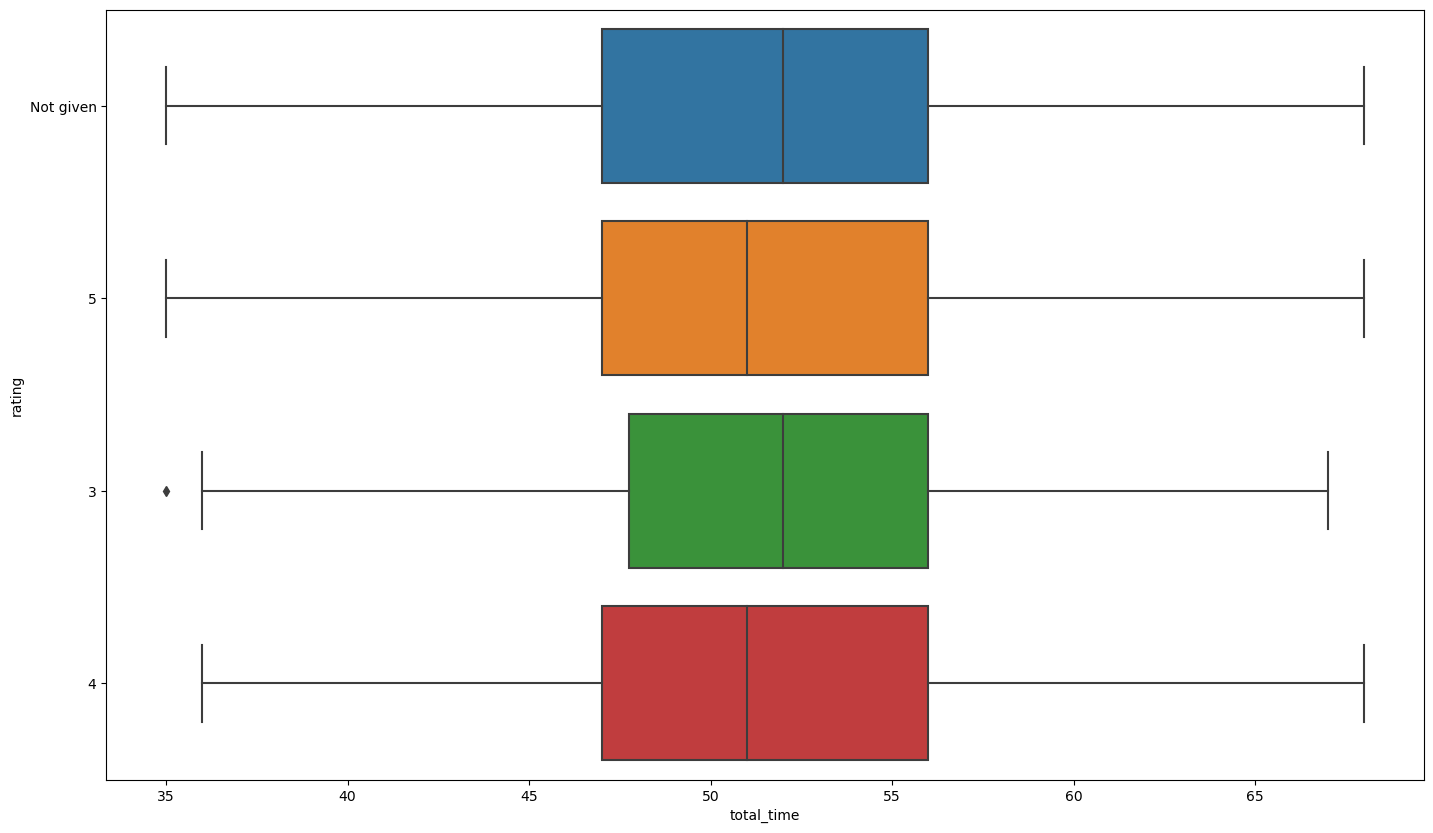

In [339]:
plt.figure(figsize=(17,10))
sns.boxplot(data=df, x='total_time', y='rating')

#### Observations:
* The 10.54% of the orders take more that 60 minutes to get delivered from the time the order is placed.(Food preparation and delivery time)

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [337]:
mean_dt_weekdays=(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean())
mean_dt_weekends=(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean())
print(round(mean_dt_weekdays, 2))
print(round(mean_dt_weekends, 2))


28.34
22.47


#### Observations:
* The delivery time during the weekdays is 28.34 minutes and during the weekends is 22.47 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The most common cuisine type is the American, Japanese, Italian and Chinese respectfully. It is also observed that the amount of the orders is more the doubled on the Weekends from the Weekdays. There are also common values for these 4 cuisine types like the Cost of the orders, the preparation and delivery time. No correlation between the values of the total time of the order and the cost of the order.

### Recommendations:

*  It would be recommended to encourage the restaurants to deliver the orders during the weekdays on a shorter time comparing to the weekends and also encourage the customers to rate the restaurants to have a better view on the quality of the delivery. Finally, I would recommend adding a column on the data, such as “Quality of the food”. In that way you can also correlate the quality of the food with the rest of the values in our data. 

---